In [14]:
from wassnmf.validation import *
from wassnmf.wassdil import *
import torch

In [17]:
%load_ext autoreload
%autoreload 2

In [9]:
scenario =  {
    "name": "gaussian_mixture",
    "n_samples": 20,
    "n_features": 20
}

In [11]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Available device: {device}")

Available device: cuda


In [12]:
X_cuda = torch.tensor(X, device=device)
K_cuda = torch.tensor(K, device=device)

In [81]:
import torch
import torch.nn as nn
import torch.optim as optim

def wasserstein_nmf(X, K, k, eps=0.025, rho1=0.05, rho2=0.05, n_iter=10):
    """
    Wasserstein NMF implementation in PyTorch

    Args:
        X: Input matrix
        K: Kernel matrix
        k: Rank of the factorization
        eps: Entropy regularization parameter
        rho1: Penalty parameter for the first constraint
        rho2: Penalty parameter for the second constraint
        n_iter: Number of iterations

    Returns:
        D, Λ: Factorization matrices
    """

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Initialize D and Λ
    D = torch.rand(X.shape[0], k, device=device, requires_grad=True)
    D.data = D.data / D.data.sum(dim=1, keepdim=True)
    Λ = torch.rand(k, X.shape[1], device=device, requires_grad=True)
    Λ.data = Λ.data / Λ.data.sum(dim=0, keepdim=True)

    # Define the optimizer
    optimizer = optim.Adam([D, Λ], lr=0.01)

    # Iterative optimization
    for _ in range(n_iter):
        # Compute the Wasserstein distance loss
        loss = torch.sum(K * (D @ Λ - X).pow(2)) + \
               rho1 * torch.sum(torch.log(D.sum(dim=1))) + \
               rho2 * torch.sum(torch.log(Λ.sum(dim=0))) + \
               eps * (torch.sum(D * torch.log(D)) + torch.sum(Λ * torch.log(Λ)))

        # Backpropagate and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Project D and Λ onto the simplex
        D.data = D.data / D.data.sum(dim=1, keepdim=True)
        Λ.data = Λ.data / Λ.data.sum(dim=0, keepdim=True)

    return D.detach().cpu().numpy(), Λ.detach().cpu().numpy()

In [ ]:
 wasserstein_nmf(X_cuda, K_cuda, 1)

(array([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]], dtype=float32),
 array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1.]], dtype=float32))

In [41]:
model = WassersteinDiL(dtype=torch.float32)

In [42]:
D, Lambda = model.fit(X_cuda, K_cuda, 3, verbose=True, device=device)

INFO:wassnmf.wassdil:Training on device: cuda
INFO:wassnmf.wassdil:X shape: torch.Size([20, 20]), K shape: torch.Size([20, 20])


TypeError: WassersteinDiL.simplex_norm() missing 1 required positional argument: 'self'

In [90]:
from wassnmf.functional import *

In [79]:
nmf_model = WassersteinNMF(n_components=3, device='cuda', verbose=False,
                           n_iter=10)


In [100]:
X, K, coord, cost_matrix = generate_data(scenario)

In [105]:
X = X / X.sum()
coords = torch.randn(20, 2)  # Example: 2D coordinates for each row of X
K = torch.cdist(coords, coords) ** 2
K = torch.exp(-K / 0.1) # Gibbs Kernel


In [130]:
X_cuda = torch.tensor(X, device=device, dtype=torch.float32)#.cuda()
K_cuda = torch.tensor(K, device=device, dtype=torch.float32)#.cuda()

C:\Users\ecrob\AppData\Local\Temp\ipykernel_58732\4155475608.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  K_cuda = torch.tensor(K, device=device, dtype=torch.float32)#.cuda()


In [131]:
X_cuda

tensor([[7.6892e-17, 6.3963e-22, 6.1746e-21, 2.8876e-16, 7.3601e-15, 3.6172e-13,
         3.2331e-13, 1.1016e-07, 7.8704e-19, 4.1213e-19, 5.1565e-24, 1.9146e-20,
         2.0479e-23, 1.2685e-16, 1.9540e-24, 1.5050e-17, 1.0696e-19, 1.3719e-17,
         4.7791e-27, 5.4413e-22],
        [2.5120e-11, 2.4334e-15, 1.6668e-14, 7.5118e-11, 1.2077e-09, 1.8782e-08,
         1.6964e-08, 1.2174e-04, 6.6834e-13, 4.6768e-13, 3.8279e-17, 4.1141e-14,
         1.4994e-16, 5.1522e-11, 2.1211e-17, 9.1020e-12, 1.4132e-13, 8.1396e-12,
         1.6788e-19, 2.5864e-15],
        [3.3749e-07, 3.8073e-10, 1.8504e-09, 8.0363e-07, 8.1503e-06, 4.0106e-05,
         3.6603e-05, 5.5332e-03, 2.3341e-08, 2.1826e-08, 1.1686e-11, 3.6357e-09,
         4.5146e-11, 8.6060e-07, 9.4686e-12, 2.2638e-07, 7.6793e-09, 1.9860e-07,
         2.4253e-13, 5.0560e-10],
        [1.8647e-04, 2.4498e-06, 8.4481e-06, 3.5357e-04, 2.2619e-03, 3.5220e-03,
         3.2481e-03, 1.0342e-02, 3.3522e-05, 4.1889e-05, 1.4673e-07, 1.3213e-05,
       

In [120]:
X_cuda.dtype, K_cuda.dtype

(torch.float64, torch.float64)

In [132]:
D_torch, Lambda_torch = wasserstein_nmf_gpu(X_cuda, 
                                            K_cuda, k, n_iter=1)

Wasserstein-NMF (GPU): iteration 1


In [133]:
D_torch

tensor([[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]], grad_fn=<ToCopyBackward0>)

In [128]:
Lambda_torch

tensor([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]],
       grad_fn=<ToCopyBackward0>)

In [151]:

# Example data
m = 20  # Number of rows in X
n = 20 # Number of columns in X
k = 3   # Number of components
X, K, _, _ = generate_data(scenario)
X = torch.tensor(X, dtype=torch.float32)
# X = torch.rand(m, n)
# X = X / X.sum(dim=0, keepdim=True) # ensure columns of X sum to 1

# Create a cost matrix (example: squared Euclidean distance)
# coords = torch.randn(m, 2)  # Example: 2D coordinates for each row of X
# K = torch.cdist(coords, coords) ** 2
# K = torch.exp(-K / 0.1) # Gibbs Kernel
K = torch.tensor(K, dtype=torch.float32)
 
# Move data to GPU
X_cuda = X.cuda()
K_cuda = K.cuda()

# Run GPU version
D_torch, Lambda_torch = wasserstein_nmf_gpu(X_cuda, K_cuda, k, n_iter=10)

# Verify reconstruction (should be close to the original X)
X_reconstructed = torch.matmul(D_torch, Lambda_torch)
print("\nReconstruction Error (GPU):", torch.norm(X.cpu() - X_reconstructed)) #compare with X on the CPU

Wasserstein-NMF (GPU): iteration 1
Wasserstein-NMF (GPU): iteration 2
Wasserstein-NMF (GPU): iteration 3
Wasserstein-NMF (GPU): iteration 4
Wasserstein-NMF (GPU): iteration 5
Wasserstein-NMF (GPU): iteration 6
Wasserstein-NMF (GPU): iteration 7
Wasserstein-NMF (GPU): iteration 8
Wasserstein-NMF (GPU): iteration 9
Wasserstein-NMF (GPU): iteration 10

Reconstruction Error (GPU): tensor(1.3781, grad_fn=<LinalgVectorNormBackward0>)


In [57]:
import seaborn as sns

In [152]:
X_rec = D_torch @ Lambda_torch

<Axes: >

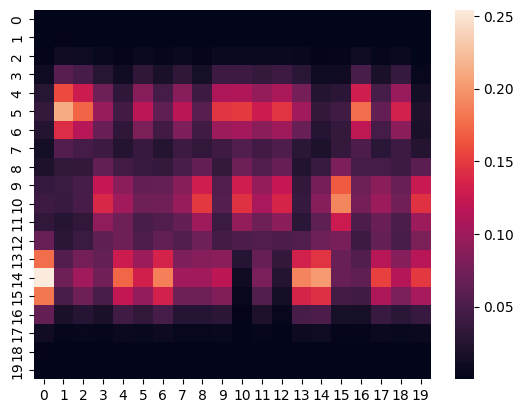

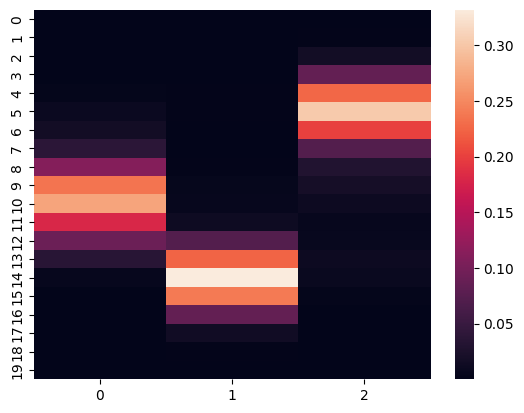

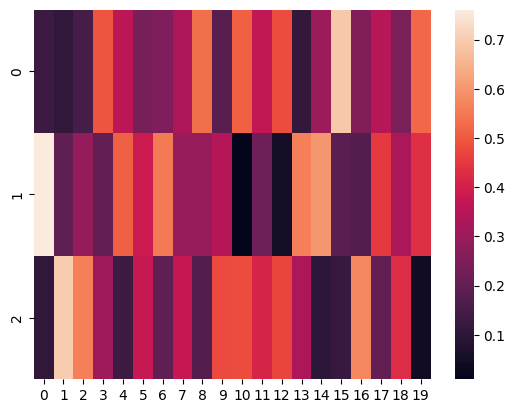

In [161]:
import matplotlib.pyplot as plt

sns.heatmap(X_rec.detach().numpy())

plt.show()

sns.heatmap(D_torch.detach().numpy())
plt.show()

sns.heatmap(Lambda_torch.detach().numpy())
plt.show() 

<Axes: >

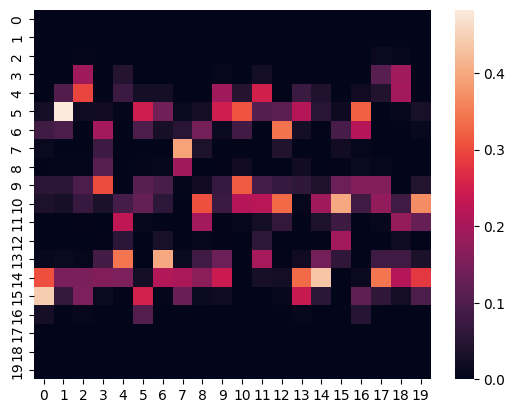

In [154]:
sns.heatmap(X)

<Axes: >

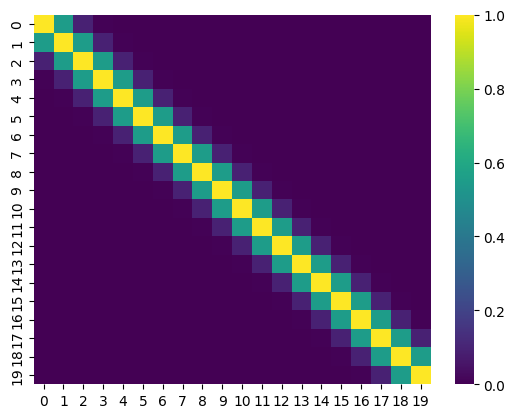

In [160]:



sns.heatmap(K.detach().numpy(), cmap='viridis')


In [162]:
from sklearn.decomposition import NMF

In [163]:
model = NMF(n_components=3, init='random', random_state=0)

In [165]:
W = model.fit_transform(X)
H = model.components_

In [166]:
X_nmf = np.dot(W, H)

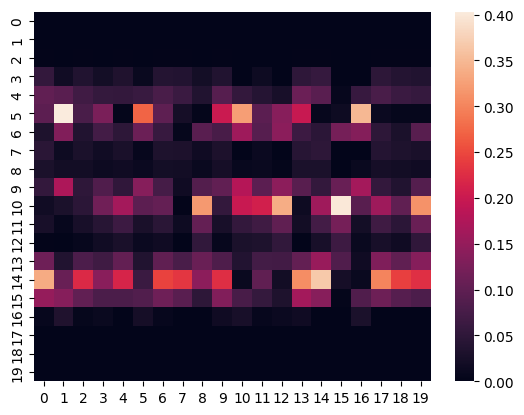

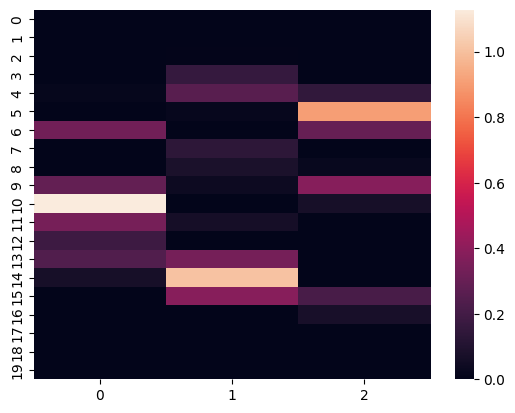

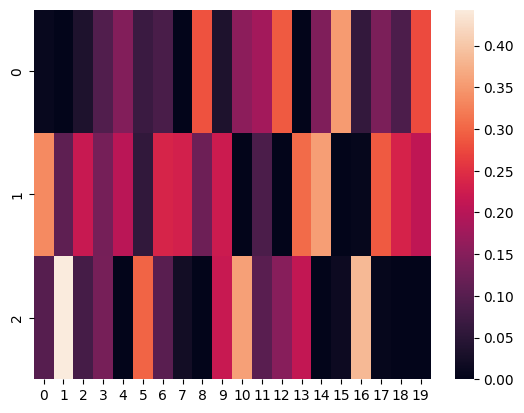

In [168]:
sns.heatmap(X_nmf)
plt.show()

sns.heatmap(W)
plt.show()  

sns.heatmap(H)
plt.show()  

In [169]:
import wsingular

In [170]:
# Example data
m = 20  # Number of rows in X
n = 20 # Number of columns in X
k = 3   # Number of components
X, K, _, _ = generate_data(scenario)
X = torch.tensor(X, dtype=torch.float32)

In [172]:
C, D = wsingular.sinkhorn_singular_vectors(
    X,
    eps=5e-2,
    dtype=X.dtype,
    device=device,
    n_iter=100,
    progress_bar=True,
)

  0%|          | 0/190 [00:00<?, ?it/s]c:\Users\ecrob\Projects\wassdil\wassnmf\.venv\Lib\site-packages\ot\bregman\_sinkhorn.py:667: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn(


In [174]:
C, D = C.cpu(), D.cpu()

In [181]:
sorted(C)

RuntimeError: Boolean value of Tensor with more than one value is ambiguous

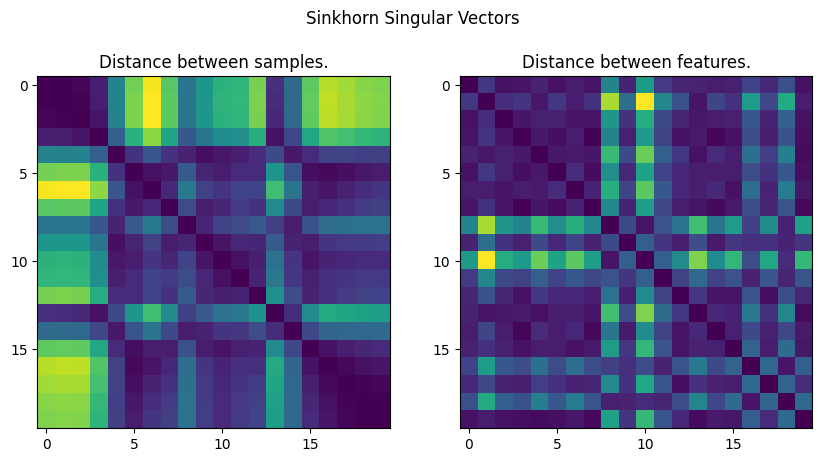

In [182]:
# Display the SSV.
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Sinkhorn Singular Vectors')

axes[0].set_title('Distance between samples.')
axes[0].imshow(D)
axes[0].set_xticks(range(0, m, 5))
axes[0].set_yticks(range(0, m, 5))

axes[1].set_title('Distance between features.')
axes[1].imshow(C)
axes[1].set_xticks(range(0, n, 5))
axes[1].set_yticks(range(0, n, 5))

plt.show()

In [183]:

K = torch.tensor(C, dtype=torch.float32)
 
# Move data to GPU
X_cuda = X.cuda()
K_cuda = K.cuda()

# Run GPU version
D_torch, Lambda_torch = wasserstein_nmf_gpu(X_cuda, K_cuda, k, n_iter=10)

# Verify reconstruction (should be close to the original X)
X_reconstructed_C = torch.matmul(D_torch, Lambda_torch)
print("\nReconstruction Error (GPU):", torch.norm(X.cpu() - X_reconstructed)) #compare with X on the CPU

C:\Users\ecrob\AppData\Local\Temp\ipykernel_58732\1645899432.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  K = torch.tensor(C, dtype=torch.float32)


Wasserstein-NMF (GPU): iteration 1
Wasserstein-NMF (GPU): iteration 2
Wasserstein-NMF (GPU): iteration 3
Wasserstein-NMF (GPU): iteration 4
Wasserstein-NMF (GPU): iteration 5
Wasserstein-NMF (GPU): iteration 6
Wasserstein-NMF (GPU): iteration 7
Wasserstein-NMF (GPU): iteration 8
Wasserstein-NMF (GPU): iteration 9
Wasserstein-NMF (GPU): iteration 10

Reconstruction Error (GPU): tensor(1.6842, grad_fn=<LinalgVectorNormBackward0>)
